# TensorFlow NN
- Sequential
- Functional
- Flow: Make the model, Complie, Fit, Predict, Evaluate, Visualization of loss and acc

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [4]:
X,y = make_circles(1000,noise=0.03)

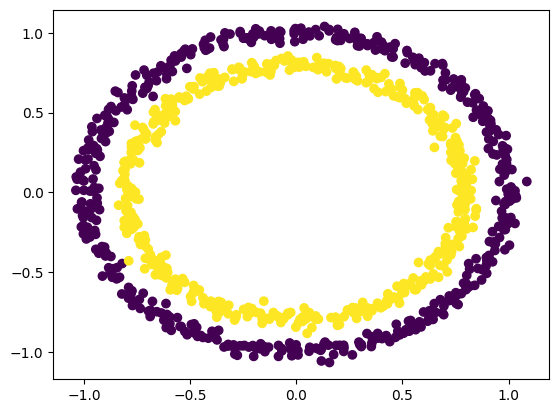

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [6]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(X,y,train_size=0.8)
print(x_train.shape,x_test.shape)

(800, 2) (200, 2)


In [10]:
# y_train = tf.one_hot(y_train,depth=2)
# y_test = tf.one_hot(y_test,depth=2)

# print(y_train.shape,y_test.shape)

(800, 2) (200, 2)


In [29]:
# model = keras.Sequential([
#     layers.Input(shape=(2,)),
#     layers.Dense(16,activation='relu'),
#     layers.Dense(8,activation='relu'),
#     layers.Dense(4,activation='relu'),
#     layers.Dense(2,activation='softmax')
# ])

# print(model.summary())


model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
print(model.summary())

model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471 (1.84 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4588 - loss: 0.7055 - val_accuracy: 0.4750 - val_loss: 0.6971
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4744 - loss: 0.6973 - val_accuracy: 0.4200 - val_loss: 0.6961
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4543 - loss: 0.6934 - val_accuracy: 0.4500 - val_loss: 0.6963
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5199 - loss: 0.6900 - val_accuracy: 0.4700 - val_loss: 0.6967
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5125 - loss: 0.6896 - val_accuracy: 0.4700 - val_loss: 0.6959
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5005 - loss: 0.6880 - val_accuracy: 0.4700 - val_loss: 0.6953
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5145 - loss: 0.6859 - val_accuracy: 0.4700 - val_loss: 0.6943
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5236 - loss: 0.6832 - val_accurac

In [30]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0113 


[0.012032246217131615, 1.0]

In [31]:
ypred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [33]:
# np.argmax(ypred,axis = 1)
# ypred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


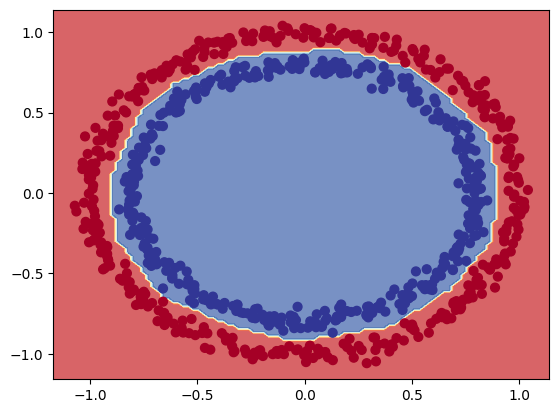

In [34]:
# plot_decision_boundary(model,x_train,np.argmax(y_train,axis=1))
plot_decision_boundary(model,x_train,y_train)

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

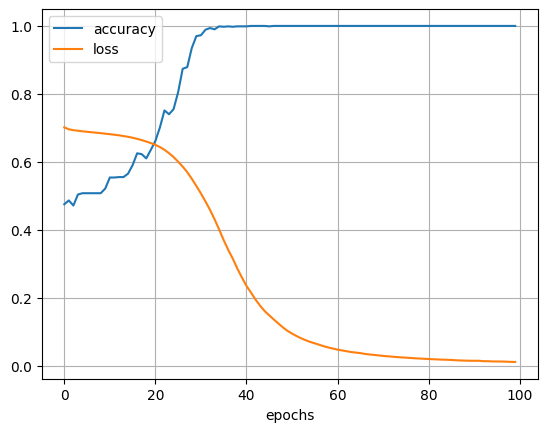

In [36]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['loss'],label = 'loss')

plt.legend()
plt.xlabel('epochs')
plt.grid()
plt.show()

In [37]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0113 


[0.012032246217131615, 1.0]

In [38]:
Input = keras.Input(shape=(2,))
x = layers.Dense(10,activation='relu')(Input)
x = layers.Dense(20,activation='relu')(x)
x = layers.Dense(10,activation='relu')(x)
output = layers.Dense(1,activation='sigmoid')(x)

model = keras.Model(inputs = Input, outputs = output)

print(model.summary())

model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471 (1.84 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4706 - loss: 0.7046 - val_accuracy: 0.4500 - val_loss: 0.7003
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4866 - loss: 0.6956 - val_accuracy: 0.3850 - val_loss: 0.7002
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4398 - loss: 0.6910 - val_accuracy: 0.4250 - val_loss: 0.6997
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4845 - loss: 0.6900 - val_accuracy: 0.4600 - val_loss: 0.6993
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4633 - loss: 0.6919 - val_accuracy: 0.4650 - val_loss: 0.6987
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5004 - loss: 0.6903 - val_accuracy: 0.4600 - val_loss: 0.6987
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4981 - loss: 0.6885 - val_accuracy: 0.4650 - val_loss: 0.6986
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5070 - loss: 0.6879 - val_accurac

In [39]:
model.inputs

[<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_31>]

In [40]:
model.layers

[<InputLayer name=input_layer_5, built=True>,
 <Dense name=dense_20, built=True>,
 <Dense name=dense_21, built=True>,
 <Dense name=dense_22, built=True>,
 <Dense name=dense_23, built=True>]

In [43]:
model.layers[-3].output

<KerasTensor shape=(None, 20), dtype=float32, sparse=False, ragged=False, name=keras_tensor_33>

In [44]:
# new_model = keras.Model(inputs = model.inputs,
#                         outputs = model.get_layer('dense_6').output)
new_model = keras.Model(inputs = model.inputs,
                        outputs = [model.layers[-2].output,model.layers[-1].output])
print(new_model.summary())

features = new_model.predict(x_test)
# for feat in features:
#     print(feat.shape)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471 (1.84 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

None
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


C:\Users\abhis\miniconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_31']
Received: inputs=Tensor(shape=(32, 2))
  warnings.warn(msg)
C:\Users\abhis\miniconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_31']
Received: inputs=Tensor(shape=(None, 2))
  warnings.warn(msg)


In [46]:
features[0].shape

(200, 10)

In [47]:
features[1].shape

(200, 1)

In [45]:
features

[array([[0.22146563, 0.01266447, 1.0553937 , ..., 1.0105437 , 1.2567867 ,
         1.4345058 ],
        [1.2500628 , 0.6549707 , 0.24646252, ..., 0.1890907 , 0.36066082,
         0.43587115],
        [0.        , 0.        , 1.1638615 , ..., 1.1790868 , 1.3786927 ,
         1.7787756 ],
        ...,
        [0.25167146, 0.02541424, 1.3640125 , ..., 1.2520813 , 1.4387994 ,
         1.3777487 ],
        [1.2063204 , 0.5315815 , 0.10980371, ..., 0.13493463, 0.18618405,
         0.3121315 ],
        [1.6345531 , 0.89142567, 0.20580894, ..., 0.07077329, 0.14182207,
         0.        ]], dtype=float32),
 array([[5.0497493e-03],
        [9.8855931e-01],
        [6.3212099e-04],
        [3.9922381e-03],
        [2.4111185e-02],
        [9.6206248e-01],
        [9.9712862e-03],
        [9.9836802e-01],
        [2.2471164e-04],
        [9.9392033e-01],
        [3.8459044e-04],
        [9.9870849e-01],
        [9.9679679e-01],
        [4.0406115e-02],
        [1.7950382e-02],
        [1.0829051e